# PyloXyloto: a homemade Deep Learning Framework
Welcome to our humble framework documentaion ^ _ ^  

> PyloXyloto is a Python-based deep learning framework that provides specialized toolboxes for working with machine learning and neural networks projects. it offers some functions for designing, training and validating deep neural networks, through a high level programming interface with just a few lines of codes.

**Modules:**

- Layers Module: 
  - FCLayer (Fully Connected Layer)
  - ConvLayer (Convolution Layer)
  - ActivationLayer
  - FlattenLayer
  - SoftmaxLayer
- Activation Functions (with its derivatives) Module:
  - sigmoid
  - tanh
  - relu
  - softmax
  - sign
- Losses Module:
  - mse (Mean Square Error)
  - perceptroncriterion (Perceptron Criterion)
  - Hinge
  - crossentropy (Cross Entropy)
  - loglikelihood (with identity and with sigmoid)
- Evaluation Metrics Module:
  - Confussion Matrix
  - Precision
  - Recall
  - Accuracy
  - F1 Score
- Utilis Module:
  - label_encoder
  - label_decoder
  - batch_normalization
  - zero_pad
  - load_model
  - save_model
- Network Module:
  - add_layer
  - set_loss
  - train
  - predict_output
- Data Module:
  - load_data
  - save_data
  - split_data
  - normalize_data
- Visualization Module:
  - visualize
  - draw
  - show_image

**Design:**


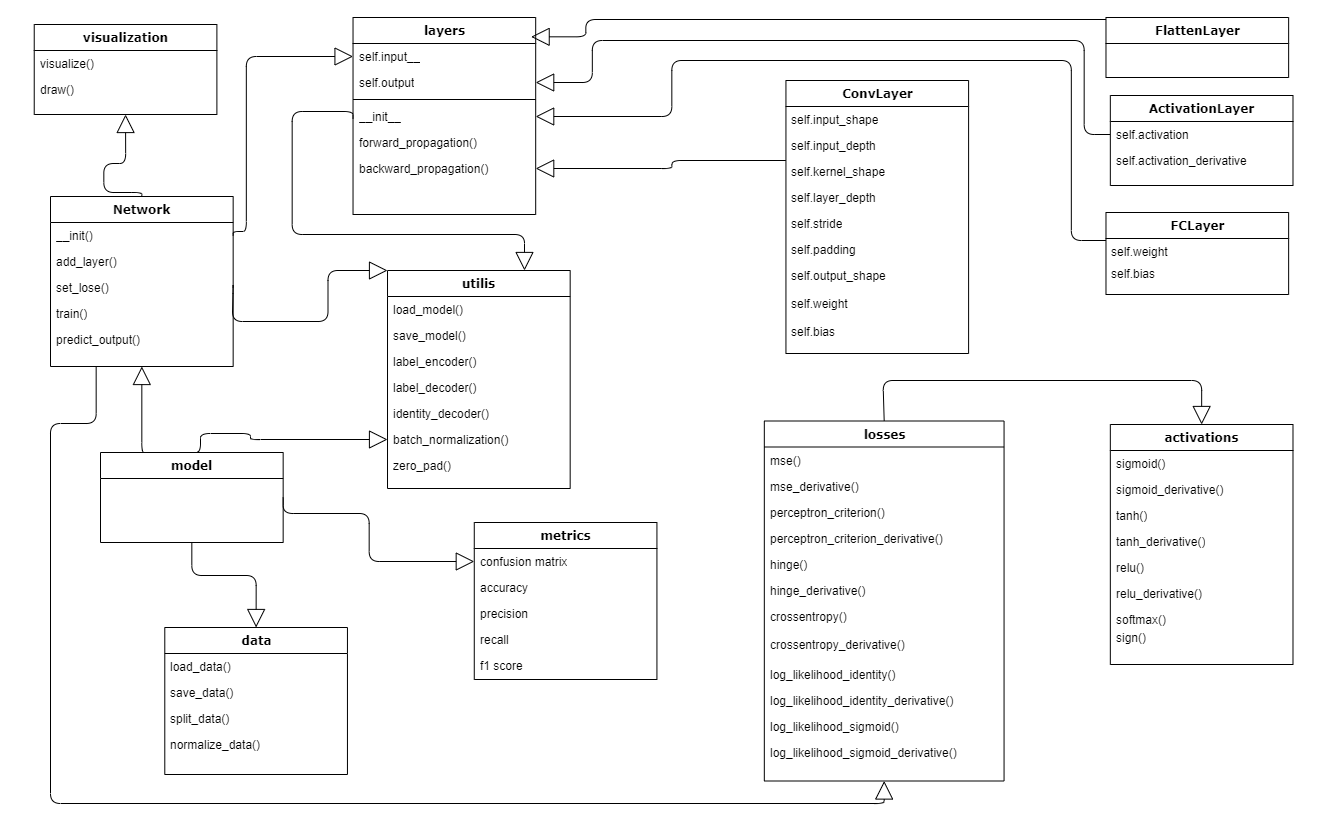


### Enough talking...let's try it !

We didn't manage to publish our framework on pypi so unfortunately we can't run it on colab and for now we'll just leave the code here and hope for a future upgrade (XD)

P.S. actually we finally managed to publish our framework on pypi but i felt it's kinda cool to leave the previous note (XD)


**How to install it**
- ## install
  - ##### pip install PyloXyloto

- ## use
  - ##### import PyloXyloto



**How to use it without installing it (XD)**

- Make sure you have (numpy, pandas, matplotlib, pickle) installed.
- Clone the repository to your system and place the PyloXyloto folder in your project directory.
- Follow the steps in the (xor_fc.py, mnist_fc.py, mnist_conv.py) to build your own network and Voila!. 









**Here we'll try 3 different examples to test our framework:**

>   - Xor with FCLayer




>   - Mnist with FCLayer




>   - Mnist with ConvLayer






> first thing to do is to install the package



In [ ]:
pip install PyloXyloto



> then ta-da we can use it 

so let's try our three examples



**1- Xor with FCLayer**


In [ ]:
# import the required modules
from PyloXyloto.net import Network
from PyloXyloto.layers import FCLayer, ActivationLayer
from PyloXyloto.activations import tanh, tanh_derivative
from PyloXyloto.losses import mse, mse_derivative
from PyloXyloto.utils import *
from PyloXyloto.metrics import *

# training data
x_train = np.array([[[0, 0]], [[0, 1]], [[1, 0]], [[1, 1]]])
y_train = np.array([[[0]], [[1]], [[1]], [[0]]])

# build the network
net = Network()
net.add_layer(FCLayer(2, 3))
net.add_layer(ActivationLayer(tanh, tanh_derivative))
net.add_layer(FCLayer(3, 1))
net.add_layer(ActivationLayer(tanh, tanh_derivative))

# train data
net.set_loss(mse, mse_derivative)
error_per_epoch, accuracy_per_epoch = net.train(x_train, y_train, epochs=1000, learning_rate=0.1)


# test the network and hope that it works ^_^
out = net.predict_output(x_train)
out_decoded = label_decoder(out)
label_decoded = list(np.squeeze(y_train))
print(out, end="\n")
print(out_decoded, end="\n")
print(label_decoded, end="\n")


# calculate confusion matrix, accuracy, precision, recall, f1 score
conf_matrix = evaluation_metric(label_decoded, out_decoded, 'confusion matrix')
accuracy = evaluation_metric(label_decoded, out_decoded, 'accuracy')
precision = evaluation_metric(label_decoded, out_decoded, 'precision')
recall = evaluation_metric(label_decoded, out_decoded, 'recall')
f1 = evaluation_metric(label_decoded, out_decoded, 'f1')

print("confusion matrix:")
print(conf_matrix, end="\n")
print("Total Accuracy: ", accuracy, end="\n")
print("Total Precision: ", precision, end="\n")
print("Total Recall: ", recall, end="\n")
print("F1 score: ", f1, end="\n")

# save model to use it later
# model = [x_train, y_train, out]
# save_model('D:/Projects/PyloXyloto/models', 'xor_fc', model)


error=0.353453491         accuracy=12.500000000         for epoch 1 of 1000
error=0.322635226         accuracy=12.500000000         for epoch 2 of 1000
error=0.300992915         accuracy=12.500000000         for epoch 3 of 1000
error=0.292239397         accuracy=12.500000000         for epoch 4 of 1000
error=0.290316995         accuracy=18.750000000         for epoch 5 of 1000
error=0.289875833         accuracy=18.750000000         for epoch 6 of 1000
error=0.289370698         accuracy=12.500000000         for epoch 7 of 1000
error=0.288675889         accuracy=12.500000000         for epoch 8 of 1000
error=0.287867051         accuracy=12.500000000         for epoch 9 of 1000
error=0.286995554         accuracy=12.500000000         for epoch 10 of 1000
error=0.286084097         accuracy=12.500000000         for epoch 11 of 1000
error=0.285141320         accuracy=18.750000000         for epoch 12 of 1000
error=0.284170087         accuracy=18.750000000         for epoch 13 of 1000
error=0.

**2- Mnist with FCLayer**


error=2.885004326         accuracy=2.700700000         for epoch 1 of 100
error=1.675178947         accuracy=3.207000000         for epoch 2 of 100
error=1.675128847         accuracy=3.207000000         for epoch 3 of 100
error=1.675069798         accuracy=3.207000000         for epoch 4 of 100
error=1.674998569         accuracy=3.207000000         for epoch 5 of 100
error=1.674909941         accuracy=3.207000000         for epoch 6 of 100
error=1.674794698         accuracy=3.207000000         for epoch 7 of 100
error=1.674634317         accuracy=3.207000000         for epoch 8 of 100
error=1.674382790         accuracy=3.207000000         for epoch 9 of 100
error=1.673866209         accuracy=3.207000000         for epoch 10 of 100
error=1.669593976         accuracy=3.207000000         for epoch 11 of 100
error=1.646610701         accuracy=3.207000000         for epoch 12 of 100
error=1.544833809         accuracy=3.385700000         for epoch 13 of 100
error=1.484165027         accuracy

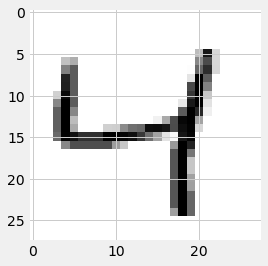

pred: 4, prob: 0.97, true: 4


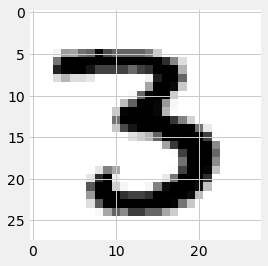

pred: 3, prob: 0.97, true: 3


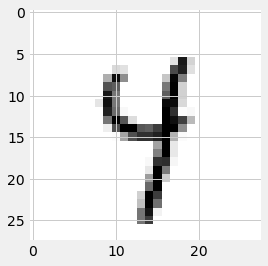

pred: 4, prob: 0.97, true: 4


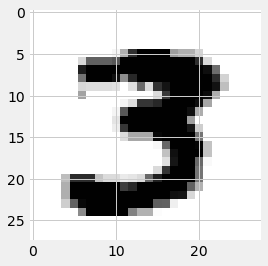

pred: 3, prob: 0.98, true: 3


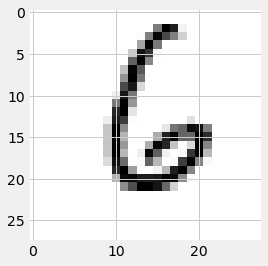

pred: 6, prob: 0.97, true: 6


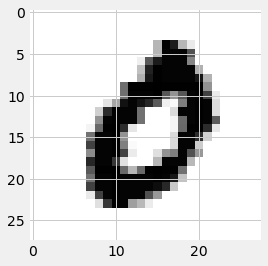

pred: 0, prob: 0.98, true: 0


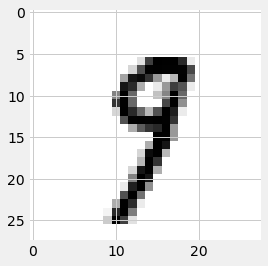

pred: 9, prob: 0.97, true: 9


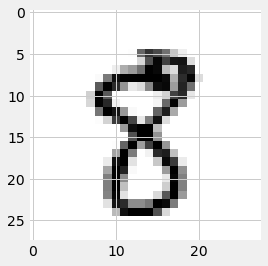

pred: 8, prob: 0.97, true: 8


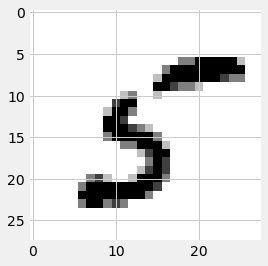

pred: 5, prob: 0.97, true: 5


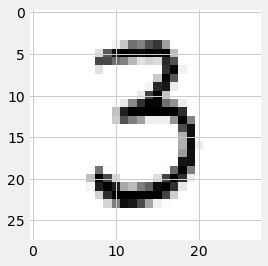

pred: 3, prob: 0.97, true: 3


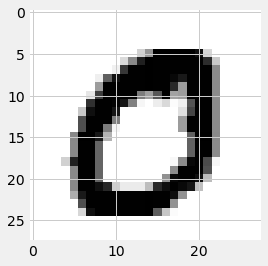

pred: 0, prob: 0.98, true: 0


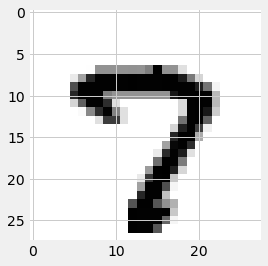

pred: 7, prob: 0.98, true: 7


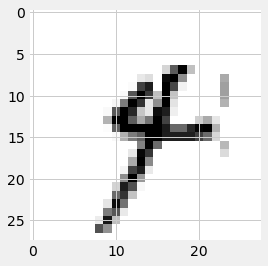

pred: 4, prob: 0.76, true: 4


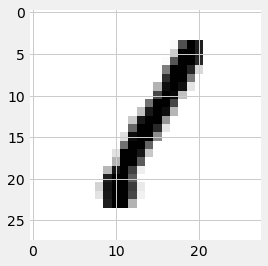

pred: 1, prob: 0.98, true: 1


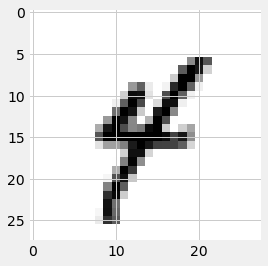

pred: 4, prob: 0.97, true: 4


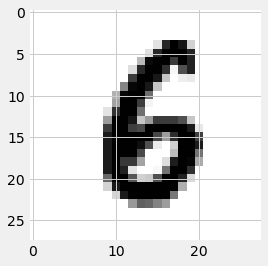

pred: 6, prob: 0.97, true: 6


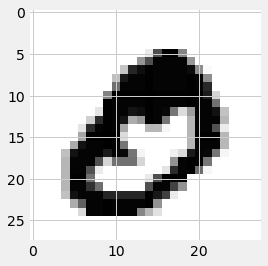

pred: 0, prob: 0.92, true: 0


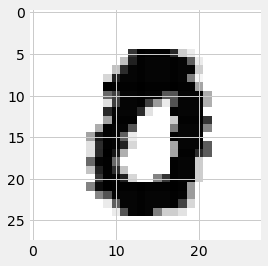

pred: 0, prob: 0.97, true: 0


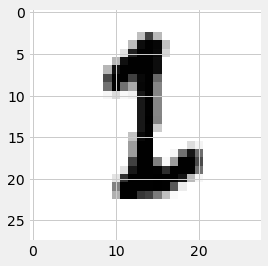

pred: 1, prob: 0.71, true: 1


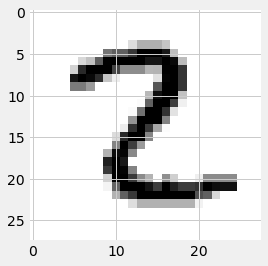

pred: 2, prob: 0.87, true: 2


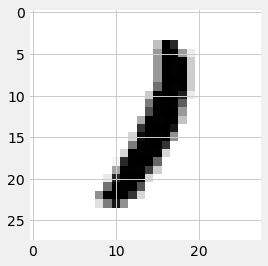

pred: 1, prob: 0.97, true: 1


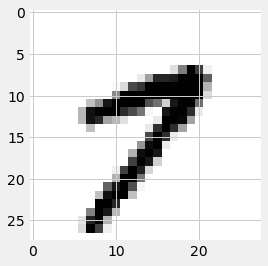

pred: 7, prob: 0.96, true: 7


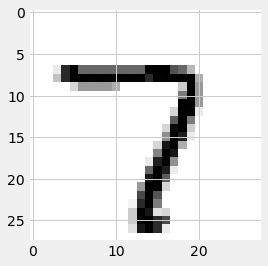

pred: 7, prob: 0.98, true: 7


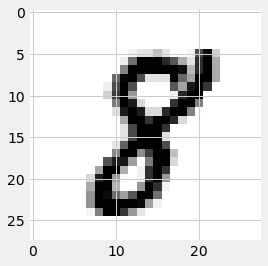

pred: 8, prob: 0.96, true: 8


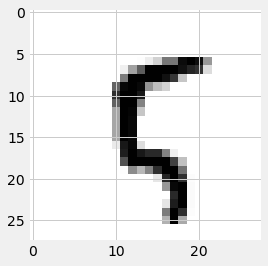

pred: 5, prob: 0.86, true: 5


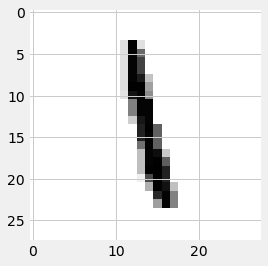

pred: 1, prob: 0.97, true: 1


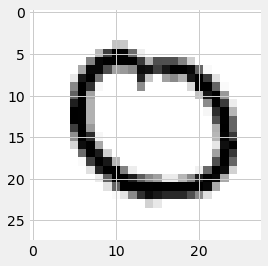

pred: 0, prob: 0.97, true: 0


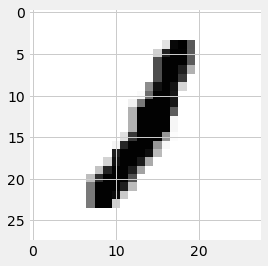

pred: 1, prob: 0.98, true: 1


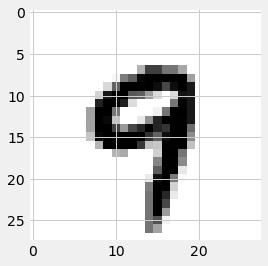

pred: 9, prob: 0.98, true: 9


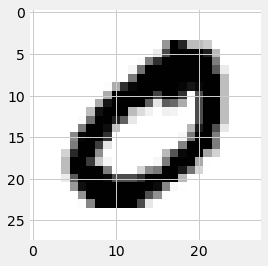

pred: 0, prob: 0.98, true: 0


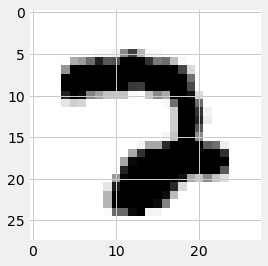

pred: 7, prob: 0.86, true: 2


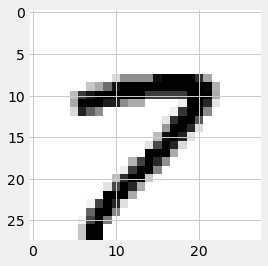

pred: 7, prob: 0.98, true: 7


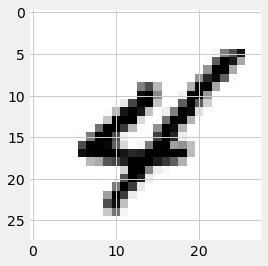

pred: 4, prob: 0.96, true: 4


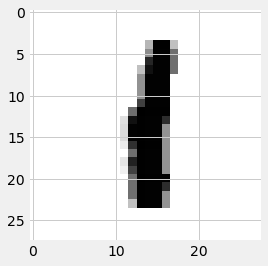

pred: 1, prob: 0.98, true: 1


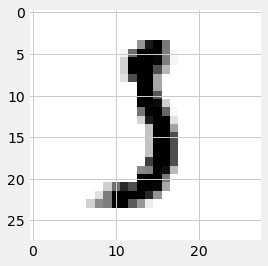

pred: 3, prob: 0.93, true: 5


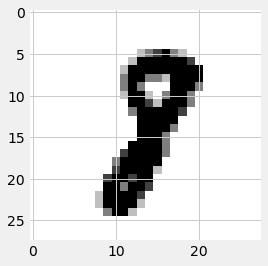

pred: 8, prob: 0.93, true: 8


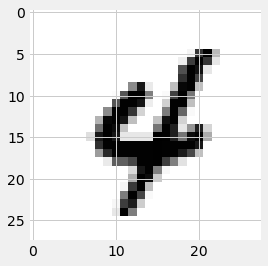

pred: 4, prob: 0.98, true: 4


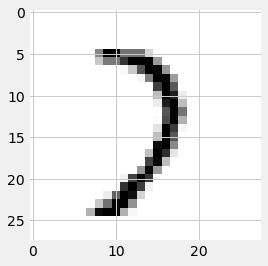

pred: 3, prob: 0.82, true: 7


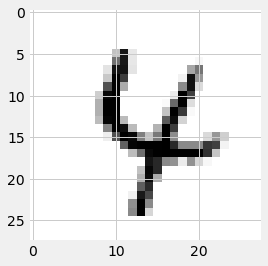

pred: 4, prob: 0.99, true: 4


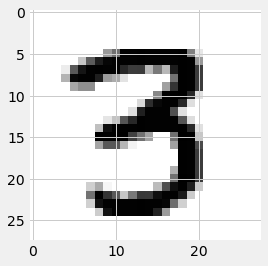

pred: 3, prob: 0.97, true: 3


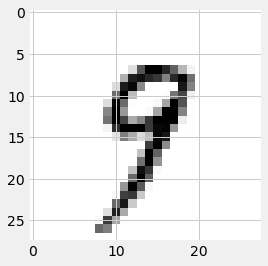

pred: 9, prob: 0.97, true: 9


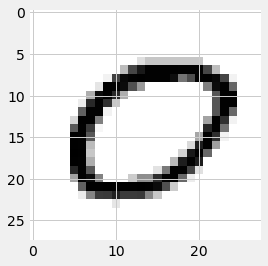

pred: 0, prob: 0.96, true: 0


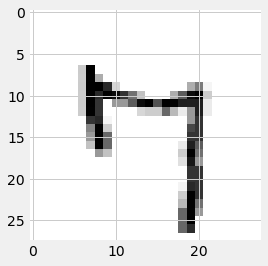

pred: 7, prob: 0.57, true: 7


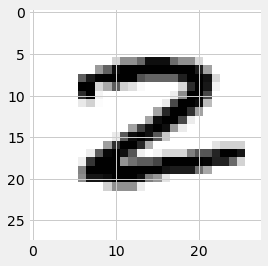

pred: 2, prob: 0.96, true: 2


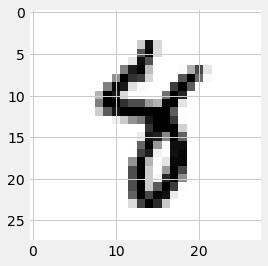

pred: 8, prob: 0.68, true: 8


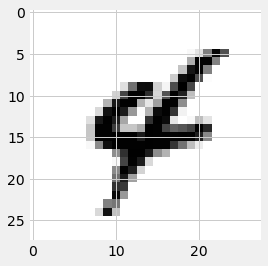

pred: 4, prob: 0.98, true: 4


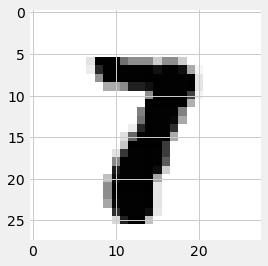

pred: 7, prob: 0.76, true: 7


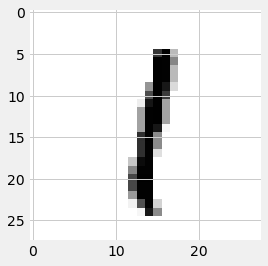

pred: 1, prob: 0.98, true: 1


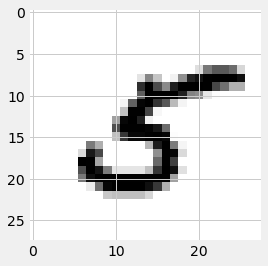

pred: 5, prob: 0.98, true: 5


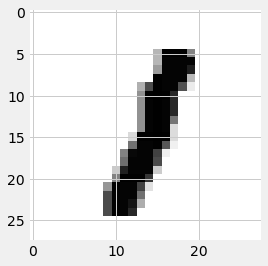

pred: 1, prob: 0.98, true: 1


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
# xor example using FC Layer
from PyloXyloto.net import Network
from PyloXyloto.layers import FCLayer, ActivationLayer
from PyloXyloto.activations import tanh, tanh_derivative
from PyloXyloto.losses import mse, mse_derivative
from PyloXyloto.utils import *
from PyloXyloto.data import *
from PyloXyloto.visualization import *
from PyloXyloto.metrics import *

# load MNIST data
dataset, x, y = load_data('https://pjreddie.com/media/files/mnist_train.csv')
# dataset, x, y = load_data('file path')
x_train, x_test, y_train, y_test = split_data(dataset, 0.7)
# training data : 0.7*42000 samples

# normalize value to [0, 1]
x_train = normalize_data(x_train)
# x_train /= 255
# reshape the dataset into 4D array
x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float64')
# encode output which is a number in range [0,9] into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = label_encoder(y_train)

# same for test data : 10000 samples
x_test = normalize_data(x_test)
# x_test /= 255
x_test = x_test.reshape(x_test.shape[0], 1, 28*28)
x_test = x_test.astype('float64')
y_test = label_encoder(y_test)


# Network
net = Network()
net.add_layer(FCLayer(28*28, 100))                # input_shape=(1, 28*28)    ;   output_shape=(1, 100)
net.add_layer(ActivationLayer(tanh, tanh_derivative))
net.add_layer(FCLayer(100, 50))                   # input_shape=(1, 100)      ;   output_shape=(1, 50)
net.add_layer(ActivationLayer(tanh, tanh_derivative))
net.add_layer(FCLayer(50, 10))                    # input_shape=(1, 50)       ;   output_shape=(1, 10)
net.add_layer(ActivationLayer(tanh, tanh_derivative))

# train on 1000 samples
# as we didn't implemented mini-batch GD, training will be pretty slow if we update at each iteration on 60000 samples.
net.set_loss(mse, mse_derivative)
error_per_epoch, accuracy_per_epoch = net.train(x_train[0:1000], y_train[0:1000], epochs=100, learning_rate=0.1)

# test on 100 samples and print predicted and true values
out = net.predict_output(x_test[0:50])
out_decoded_identity = identity_decoder(out)
out_decoded = label_decoder(out_decoded_identity)
label_decoded = label_decoder(y_test[0:50])
print("\n")
print("encoded predicted values : ")
print(out, end="\n")
print("identity encoded predicted values : ")
print(out_decoded_identity, end="\n")
print("predicted values : ")
print(out_decoded, end="\n")
print("\n")
print("identity encoded true values : ")
print(y_test[0:50], end="\n")
print("true values : ")
print(label_decoded, end="\n")

# calculate confusion matrix, accuracy, precision, recall, f1 score
conf_matrix = evaluation_metric(label_decoded, out_decoded, 'confusion matrix')
accuracy = evaluation_metric(label_decoded, out_decoded, 'accuracy')
precision = evaluation_metric(label_decoded, out_decoded, 'precision')
recall = evaluation_metric(label_decoded, out_decoded, 'recall')
f1 = evaluation_metric(label_decoded, out_decoded, 'f1')

print("confusion matrix:")
print(conf_matrix, end="\n")
# print(conf_matrix.values)
print("Total Accuracy: ", accuracy, end="\n")
print("Total Precision: ", precision, end="\n")
print("Total Recall: ", recall, end="\n")
print("F1 score: ", f1, end="\n")

# visualize error per each epoch
epochs = 100
show_image(x_test[0:50], y_test[0:50], out)
draw([k+1 for k in range(epochs)], error_per_epoch, 'Epochs', 'Error')
draw([k+1 for k in range(epochs)], accuracy_per_epoch, 'Epoch', 'Accuracy')

# save model
# model = [x_train, x_test, y_train, y_test, label_decoded, out_decoded]
# save_model('D:/Projects/PyloXyloto/models', 'mnist_fc', model)



**3- Mnist with ConvLayer**


error=8.997333036         accuracy=4.562200000         for epoch 1 of 100
error=8.996768868         accuracy=4.562200000         for epoch 2 of 100
error=8.995677970         accuracy=4.562200000         for epoch 3 of 100
error=8.987960444         accuracy=4.562200000         for epoch 4 of 100
error=8.229751293         accuracy=4.562200000         for epoch 5 of 100
error=8.147646008         accuracy=4.562200000         for epoch 6 of 100
error=7.374698872         accuracy=4.562200000         for epoch 7 of 100
error=6.533763757         accuracy=4.562200000         for epoch 8 of 100
error=5.752920289         accuracy=4.562200000         for epoch 9 of 100
error=5.752549037         accuracy=4.562200000         for epoch 10 of 100
error=5.751884430         accuracy=4.562200000         for epoch 11 of 100
error=5.750090806         accuracy=4.562200000         for epoch 12 of 100
error=5.387716244         accuracy=4.562200000         for epoch 13 of 100
error=4.805764429         accuracy

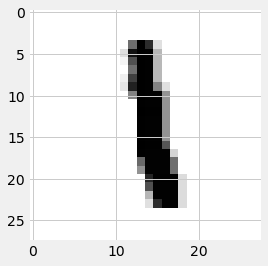

pred: 9, prob: 0.29, true: 1


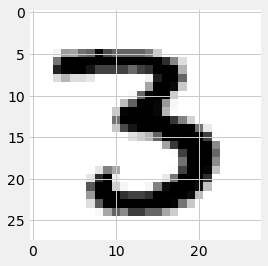

pred: 9, prob: 0.29, true: 3


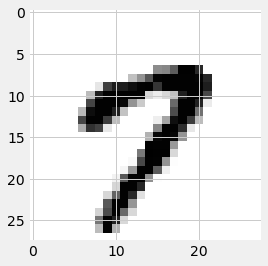

pred: 9, prob: 0.29, true: 7


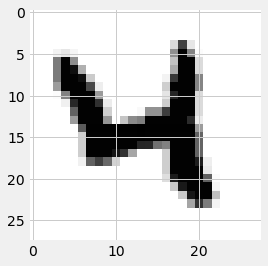

pred: 9, prob: 0.29, true: 4


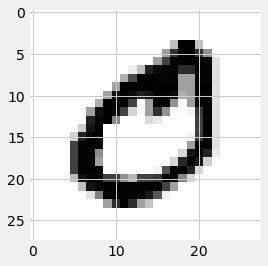

pred: 9, prob: 0.29, true: 0


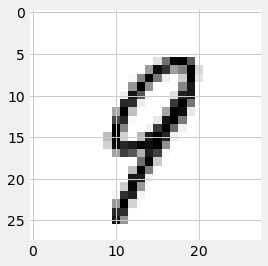

pred: 9, prob: 0.29, true: 9


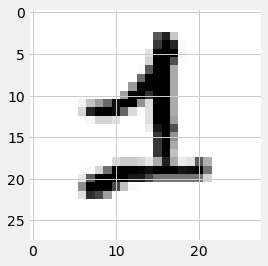

pred: 9, prob: 0.29, true: 1


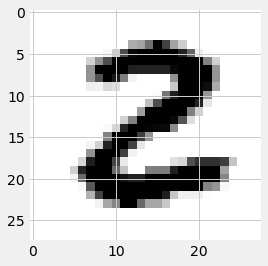

pred: 9, prob: 0.29, true: 2


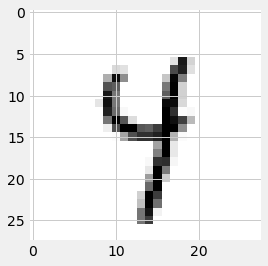

pred: 9, prob: 0.29, true: 4


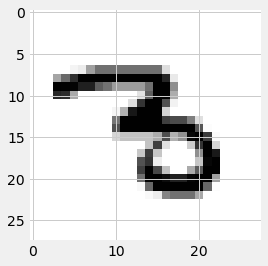

pred: 9, prob: 0.29, true: 3


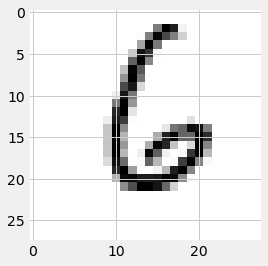

pred: 9, prob: 0.29, true: 6


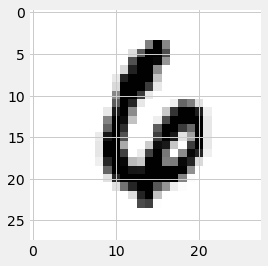

pred: 9, prob: 0.29, true: 6


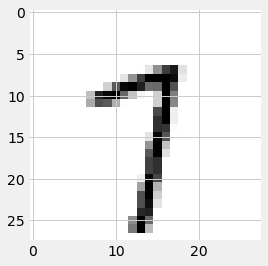

pred: 9, prob: 0.29, true: 7


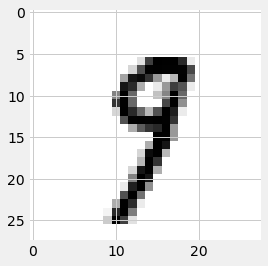

pred: 9, prob: 0.29, true: 9


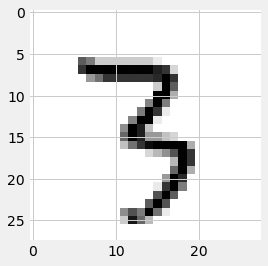

pred: 9, prob: 0.29, true: 3


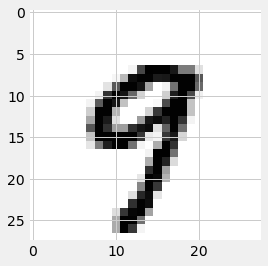

pred: 9, prob: 0.29, true: 9


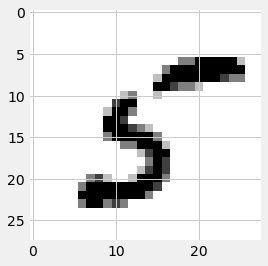

pred: 9, prob: 0.29, true: 5


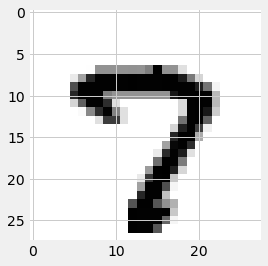

pred: 9, prob: 0.29, true: 7


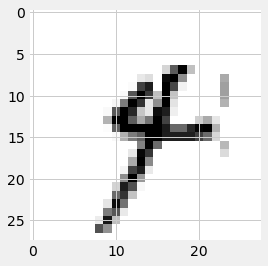

pred: 9, prob: 0.29, true: 4


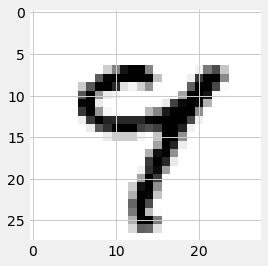

pred: 9, prob: 0.29, true: 9


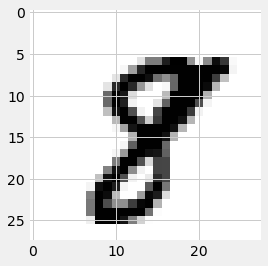

pred: 9, prob: 0.29, true: 8


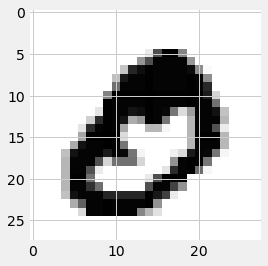

pred: 9, prob: 0.29, true: 0


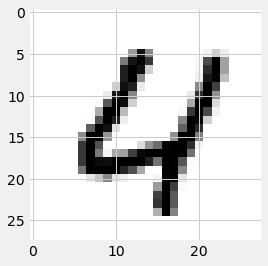

pred: 9, prob: 0.29, true: 4


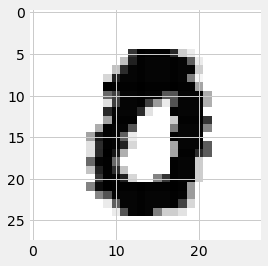

pred: 9, prob: 0.29, true: 0


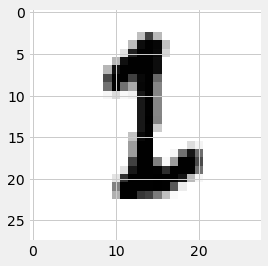

pred: 9, prob: 0.29, true: 1


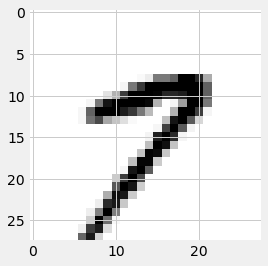

pred: 9, prob: 0.29, true: 7


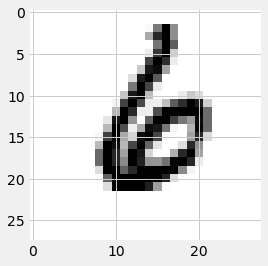

pred: 9, prob: 0.29, true: 6


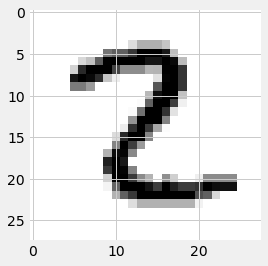

pred: 9, prob: 0.29, true: 2


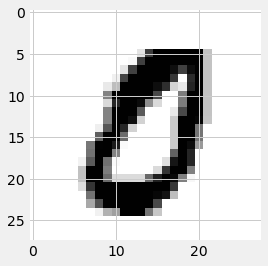

pred: 9, prob: 0.29, true: 0


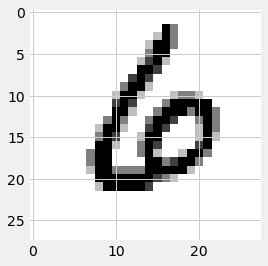

pred: 9, prob: 0.29, true: 6


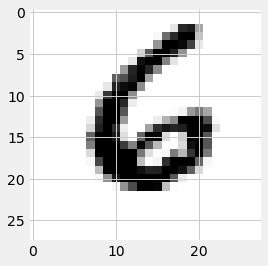

pred: 9, prob: 0.29, true: 6


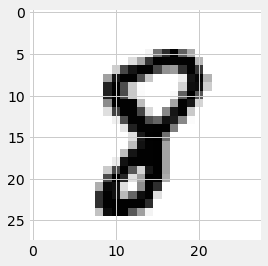

pred: 9, prob: 0.29, true: 8


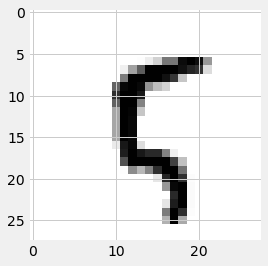

pred: 9, prob: 0.29, true: 5


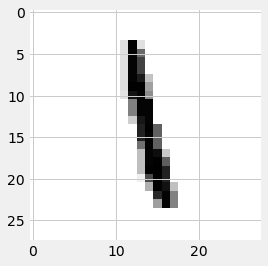

pred: 9, prob: 0.29, true: 1


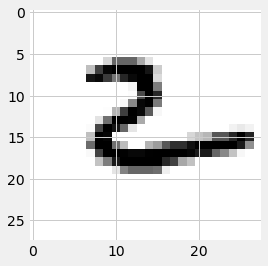

pred: 9, prob: 0.29, true: 2


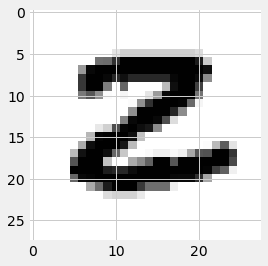

pred: 9, prob: 0.29, true: 2


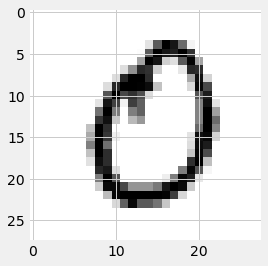

pred: 9, prob: 0.29, true: 0


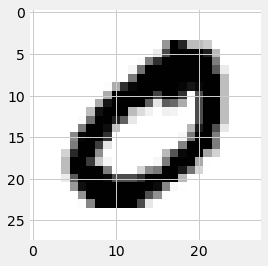

pred: 9, prob: 0.29, true: 0


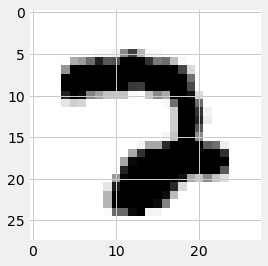

pred: 9, prob: 0.29, true: 2


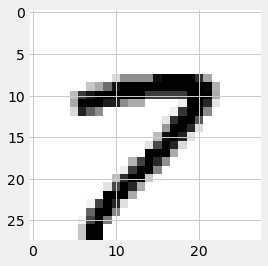

pred: 9, prob: 0.29, true: 7


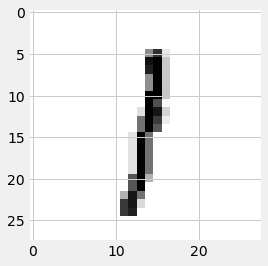

pred: 9, prob: 0.29, true: 1


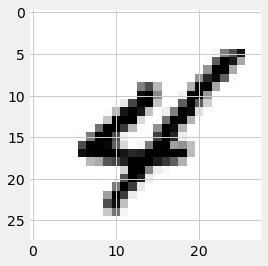

pred: 9, prob: 0.29, true: 4


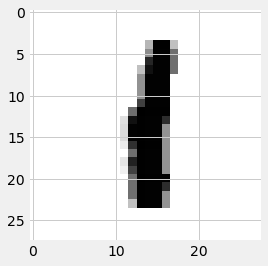

pred: 9, prob: 0.29, true: 1


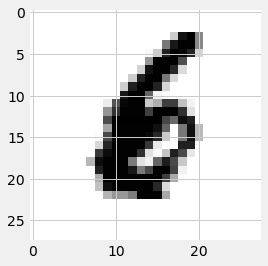

pred: 9, prob: 0.29, true: 6


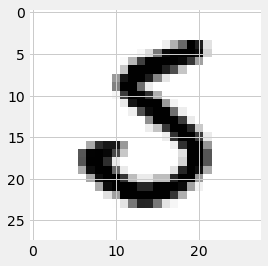

pred: 9, prob: 0.29, true: 5


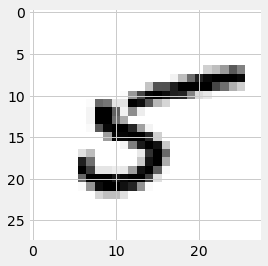

pred: 9, prob: 0.29, true: 5


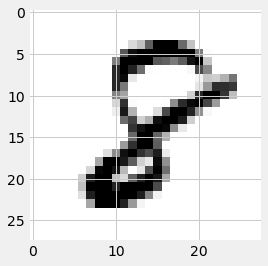

pred: 9, prob: 0.29, true: 8


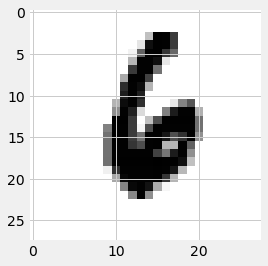

pred: 9, prob: 0.29, true: 6


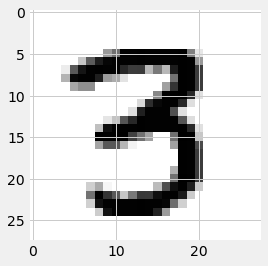

pred: 9, prob: 0.29, true: 3


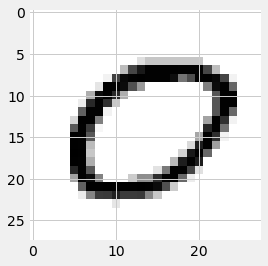

pred: 9, prob: 0.29, true: 0


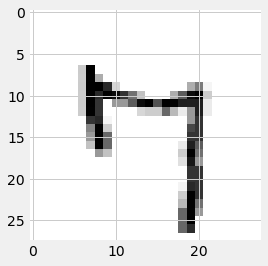

pred: 9, prob: 0.29, true: 7


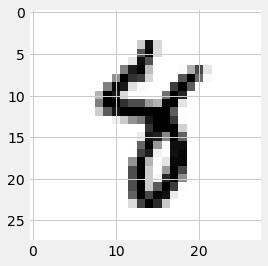

pred: 9, prob: 0.29, true: 8


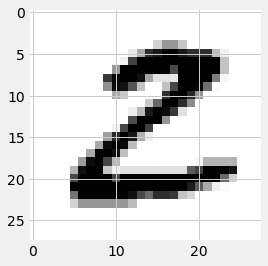

pred: 9, prob: 0.29, true: 2


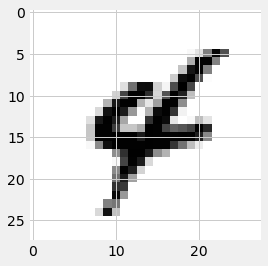

pred: 9, prob: 0.29, true: 4


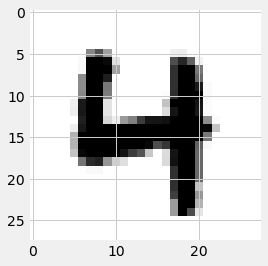

pred: 9, prob: 0.29, true: 4


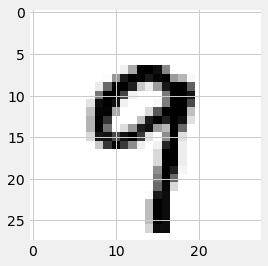

pred: 9, prob: 0.29, true: 9


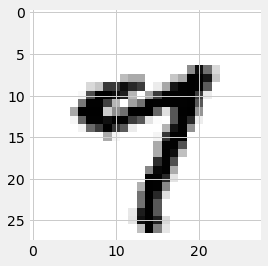

pred: 9, prob: 0.29, true: 9


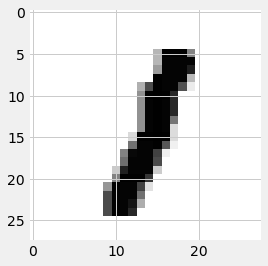

pred: 9, prob: 0.29, true: 1


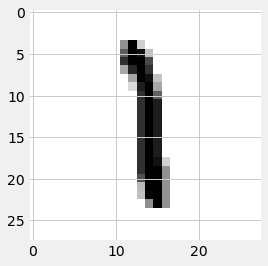

pred: 9, prob: 0.29, true: 1


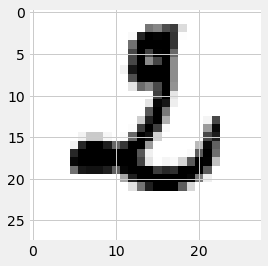

pred: 9, prob: 0.29, true: 2


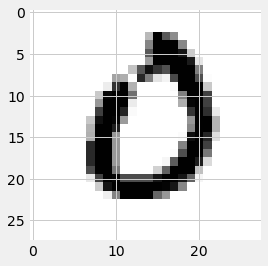

pred: 9, prob: 0.29, true: 0


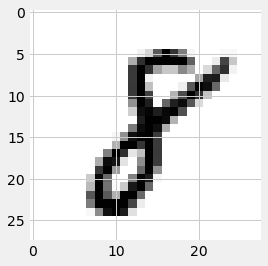

pred: 9, prob: 0.29, true: 8


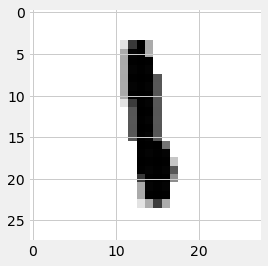

pred: 9, prob: 0.29, true: 1


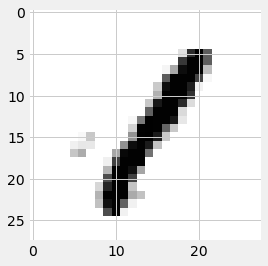

pred: 9, prob: 0.29, true: 1


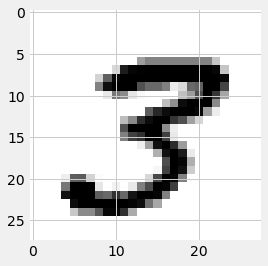

pred: 9, prob: 0.29, true: 3


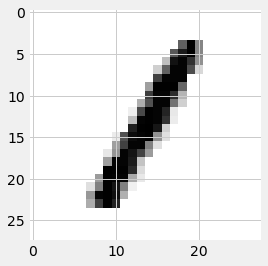

pred: 9, prob: 0.29, true: 1


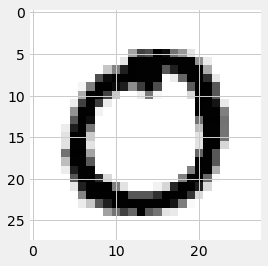

pred: 9, prob: 0.29, true: 0


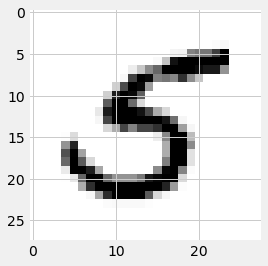

pred: 9, prob: 0.29, true: 5


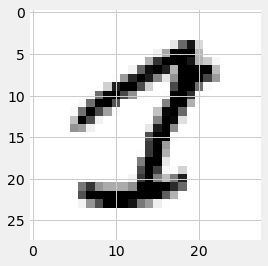

pred: 9, prob: 0.29, true: 1


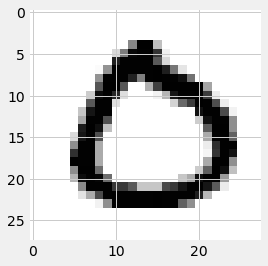

pred: 9, prob: 0.29, true: 0


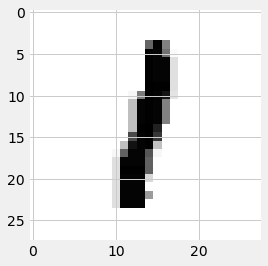

pred: 9, prob: 0.29, true: 1


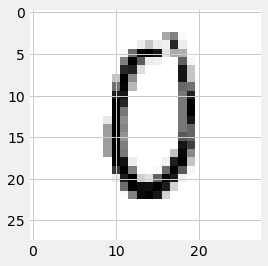

pred: 9, prob: 0.29, true: 0


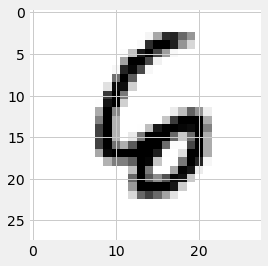

pred: 9, prob: 0.29, true: 6


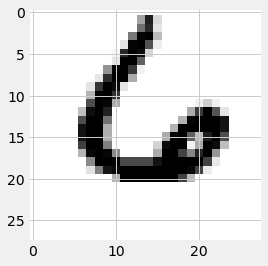

pred: 9, prob: 0.29, true: 6


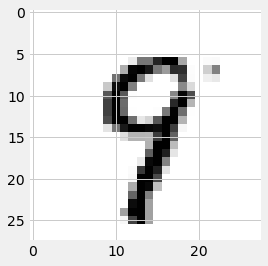

pred: 9, prob: 0.29, true: 9


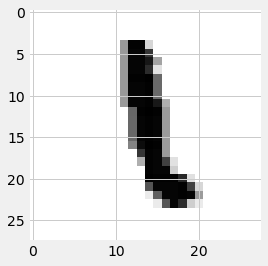

pred: 9, prob: 0.29, true: 1


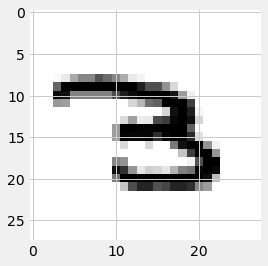

pred: 9, prob: 0.29, true: 3


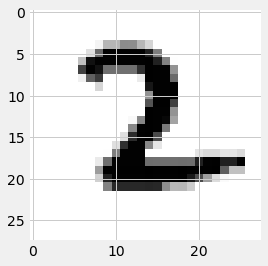

pred: 9, prob: 0.29, true: 2


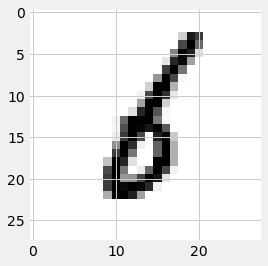

pred: 9, prob: 0.29, true: 6


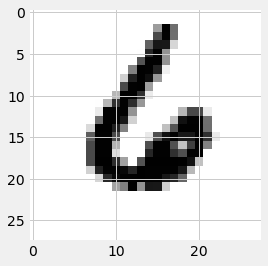

pred: 9, prob: 0.29, true: 6


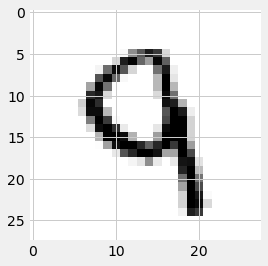

pred: 9, prob: 0.29, true: 9


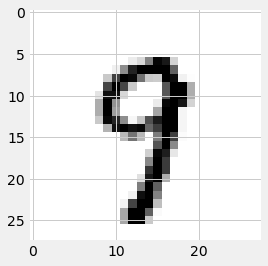

pred: 9, prob: 0.29, true: 9


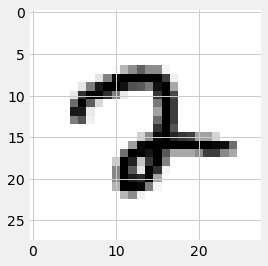

pred: 9, prob: 0.29, true: 2


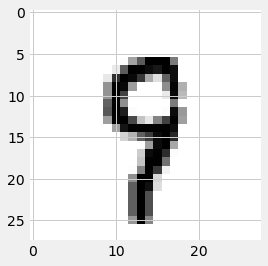

pred: 9, prob: 0.29, true: 9


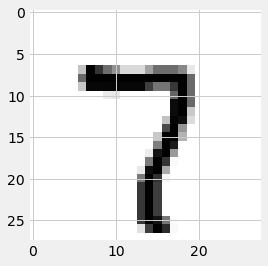

pred: 9, prob: 0.29, true: 7


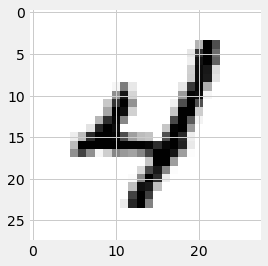

pred: 9, prob: 0.29, true: 4


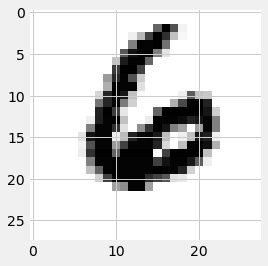

pred: 9, prob: 0.29, true: 6


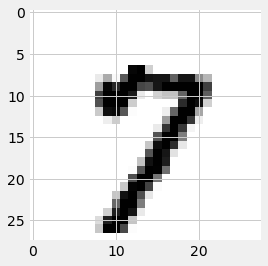

pred: 9, prob: 0.29, true: 7


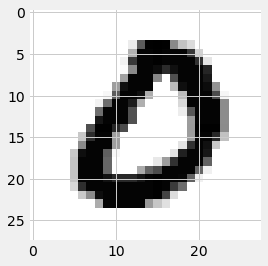

pred: 9, prob: 0.29, true: 0


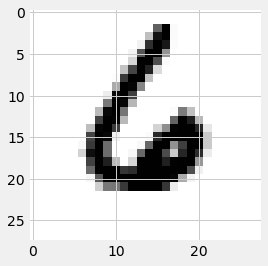

pred: 9, prob: 0.29, true: 6


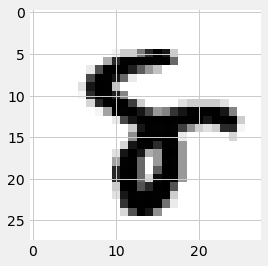

pred: 9, prob: 0.29, true: 8


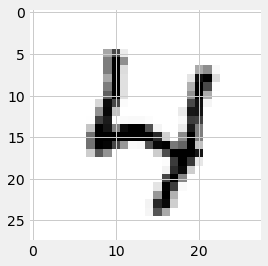

pred: 9, prob: 0.29, true: 4


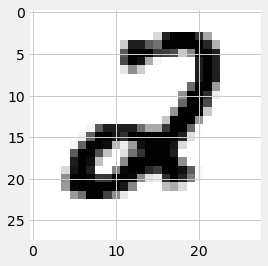

pred: 9, prob: 0.29, true: 2


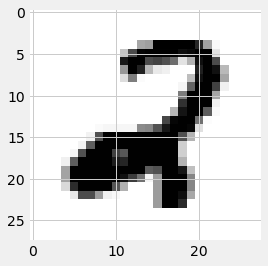

pred: 9, prob: 0.29, true: 2


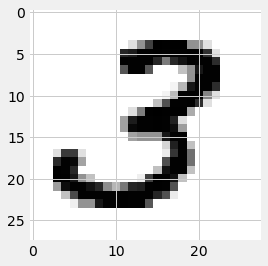

pred: 9, prob: 0.29, true: 3


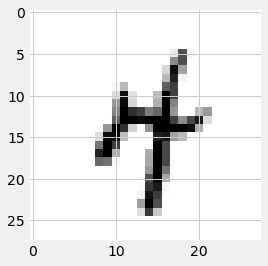

pred: 9, prob: 0.29, true: 4


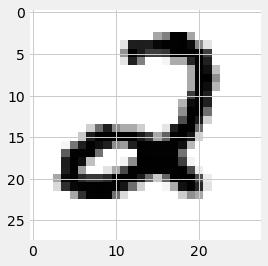

pred: 9, prob: 0.29, true: 2


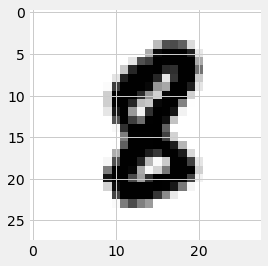

pred: 9, prob: 0.29, true: 8


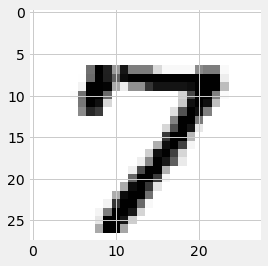

pred: 9, prob: 0.29, true: 7


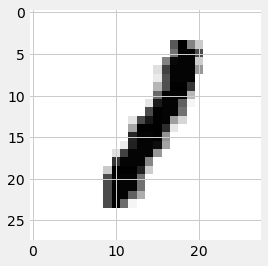

pred: 9, prob: 0.29, true: 1


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
# import the required modules
from PyloXyloto.net import Network
from PyloXyloto.layers import *
from PyloXyloto.activations import tanh, tanh_derivative
from PyloXyloto.losses import mse, mse_derivative
from PyloXyloto.utils import *
from PyloXyloto.data import *
from PyloXyloto.visualization import *
from PyloXyloto.metrics import *

# load MNIST data from a csv file
dataset, x, y = load_data('https://pjreddie.com/media/files/mnist_train.csv')
x_train, x_test, y_train, y_test = split_data(dataset, 0.7)
# training data : 0.7*42000 samples

# normalize value to [0, 1]
x_train = normalize_data(x_train)
# reshape the dataset into 4D array
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train = x_train.astype('float64')
# encode output which is a number in range [0,9] into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = label_encoder(y_train)

# same for test data
x_test = normalize_data(x_test)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_test = x_test.astype('float64')
y_test = label_encoder(y_test)

# build the Network
net = Network()
# input_shape=(28, 28, 1)   ;   output_shape=(28, 28, 1)
net.add_layer(ConvLayer(input_shape=(28, 28, 1), kernel_shape=(3, 3), layer_depth=1, stride=1, padding=1))
net.add_layer(ActivationLayer(tanh, tanh_derivative))
net.add_layer(FlattenLayer())                     # input_shape=(28, 28, 1)   ;   output_shape=(1, 28*28*1)
net.add_layer(FCLayer(28*28*1, 100))              # input_shape=(1, 28*28*1)  ;   output_shape=(1, 100)
net.add_layer(ActivationLayer(tanh, tanh_derivative))
net.add_layer(FCLayer(100, 10))                   # input_shape=(1, 100)      ;   output_shape=(1, 10)
net.add_layer(ActivationLayer(tanh, tanh_derivative))

# train on 1000 samples
# as we didn't implement mini-batch GD, training will be pretty slow if we update at each iteration on 60000 samples.
net.set_loss(mse, mse_derivative)
error_per_epoch, accuracy_per_epoch = net.train(x_train[0:1000], y_train[0:1000], epochs=100, learning_rate=0.01)

# test on 100 samples and print predicted and true values
out = net.predict_output(x_test[0:100])
out_decoded_identity = identity_decoder(out)
out_decoded = label_decoder(out_decoded_identity)
label_decoded = label_decoder(y_test[0:100])
print("\n")
print("encoded predicted values : ")
print(out, end="\n")
print("identity encoded predicted values : ")
print(out_decoded_identity, end="\n")
print("predicted values : ")
print(out_decoded, end="\n")
print("\n")
print("identity encoded true values : ")
print(y_test[0:100], end="\n")
print("true values : ")
print(label_decoded)

# calculate confusion matrix, accuracy, precision, recall, f1 score
conf_matrix = evaluation_metric(label_decoded, out_decoded, 'confusion matrix')
accuracy = evaluation_metric(label_decoded, out_decoded, 'accuracy')
precision = evaluation_metric(label_decoded, out_decoded, 'precision')
recall = evaluation_metric(label_decoded, out_decoded, 'recall')
f1 = evaluation_metric(label_decoded, out_decoded, 'f1')

print("confusion matrix:")
print(conf_matrix, end="\n")
print("Total Accuracy: ", accuracy, end="\n")
print("Total Precision: ", precision, end="\n")
print("Total Recall: ", recall, end="\n")
print("F1 score: ", f1, end="\n")

# visualize error and accuracy per each epoch
epochs = 100
show_image(x_test[0:100], y_test[0:100], out)
draw([k+1 for k in range(epochs)], error_per_epoch, 'Epoch', 'Error')
draw([k+1 for k in range(epochs)], accuracy_per_epoch, 'Epoch', 'Accuracy')

# save model
# model = [x_train, x_test, y_train, y_test, label_decoded, out_decoded]
# save_model('D:/Projects/PyloXyloto/models', 'mnist_conv', model)



